# Sandbox calibration

In [1]:
import os,sys
sys.path.append('../../sandbox')

import sandbox as sb

../../sandbox/sandbox.py:11: RuntimeWarning: Two kernels cannot access the kinect at the same time. This will lead to a sudden death of the kernel. Be sure no other kernel is running before initialize a kinect object.
  'Be sure no other kernel is running before initialize a kinect object.', RuntimeWarning)
/home/sid/.miniconda/lib/python3.6/site-packages/gempy/plotting/visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
/home/sid/.miniconda/lib/python3.6/site-packages/gempy/data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')
/home/sid/.miniconda/lib/python3.6/site-packages/gempy/posterior_analysis.py:24: UserWarning: pymc (v2) package is not installed. No support for stochastic simulation posterior ana

### Prerequisites

In [2]:
calib = sb.CalibrationData(file='calibration.json')

JSON configuration loaded.


In [3]:
sensor = sb.DummySensor(calib, depth_limits=(500,2000))

DummySensor initialized.


In [4]:
#sensor = sb.KinectV2(calib)

In [5]:
projector = sb.Projector(calib)

Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


### 1) Projector calibration

In [6]:
module = sb.CalibModule(calib, sensor, projector)

In [7]:
module.calibrate_projector()

Column
    [0] Markdown(str)
    [1] WidgetBox(css_classes=['widget-box'])
        [0] IntSlider(end=780, name='Projector top margin')
        [1] IntSlider(end=1260, name='Projector left margin', value=31)
        [2] IntSlider(end=1280, name='Projector frame width', start=10, value=1105)
        [3] IntSlider(end=800, name='Projector frame height', start=10, value=800)

### 2) Sensor calibration

In [8]:
module.setup()

In [9]:
module.run()

Thread started or resumed...


In [10]:
module.calibrate_sensor()

Column
    [0] Markdown(str)
    [1] Row
        [0] WidgetBox(css_classes=['widget-box'])
            [0] IntSlider(bar_color='#084C61', end=424, name='Sensor top margin', value=124)
            [1] IntSlider(bar_color='#084C61', end=512, name='Sensor right margin', value=86)
            [2] IntSlider(bar_color='#084C61', end=424, name='Sensor bottom margin', value=39)
            [3] IntSlider(bar_color='#084C61', end=512, name='Sensor left margin', value=106)
            [4] IntSlider(bar_color='#DBD053', end=2000, name='Vertical minimum', value=982)
            [5] IntSlider(bar_color='#DB3A34', end=2000, name='Vertical maximum', value=1366)
            [6] Button(name='Refresh sensor f...)
        [1] Matplotlib(Figure, height=335)

In [11]:
module.stop()

Thread stopped.


### 3) Save calibration

In [12]:
calib.save_json('my_calibration.json')

JSON configuration file saved: my_calibration.json


In [14]:
my_calib = sb.CalibrationData(file='my_calibration.json')

JSON configuration loaded.


### 4) Calibration summary
To simplify the calibration process, you can also start a bundled interface with tabs for projector, sensor and to save the calibration

Tabs
    [0] Column
        [0] Markdown(str)
        [1] WidgetBox(css_classes=['widget-box'])
            [0] IntSlider(end=780, name='Projector top margin', value=65)
            [1] IntSlider(end=1260, name='Projector left margin', value=31)
            [2] IntSlider(end=1280, name='Projector frame width', start=10, value=1105)
            [3] IntSlider(end=800, name='Projector frame height', start=10, value=800)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] WidgetBox(css_classes=['widget-box'])
                [0] IntSlider(bar_color='#084C61', end=424, name='Sensor top margin', value=124)
                [1] IntSlider(bar_color='#084C61', end=512, name='Sensor right margin', value=86)
                [2] IntSlider(bar_color='#084C61', end=424, name='Sensor bottom margin', value=39)
                [3] IntSlider(bar_color='#084C61', end=512, name='Sensor left margin', value=106)
                [4] IntSlider(bar_color='#DBD053', end=2000, name='Vertical minimum', value=982)
                [5] IntSlider(bar_color='#DB3A34', end=2000, name='Vertical maximum', value=1366)
                [6] Button(name='Refresh sensor f...)
            [1] Matplotlib(Figure, height=335)
    [2] WidgetBox(css_classes=['widget-box'])
        [0] TextInput(name='Choose a calibration f..., value='calibration.json')
        [1] Button(name='Save calibration')
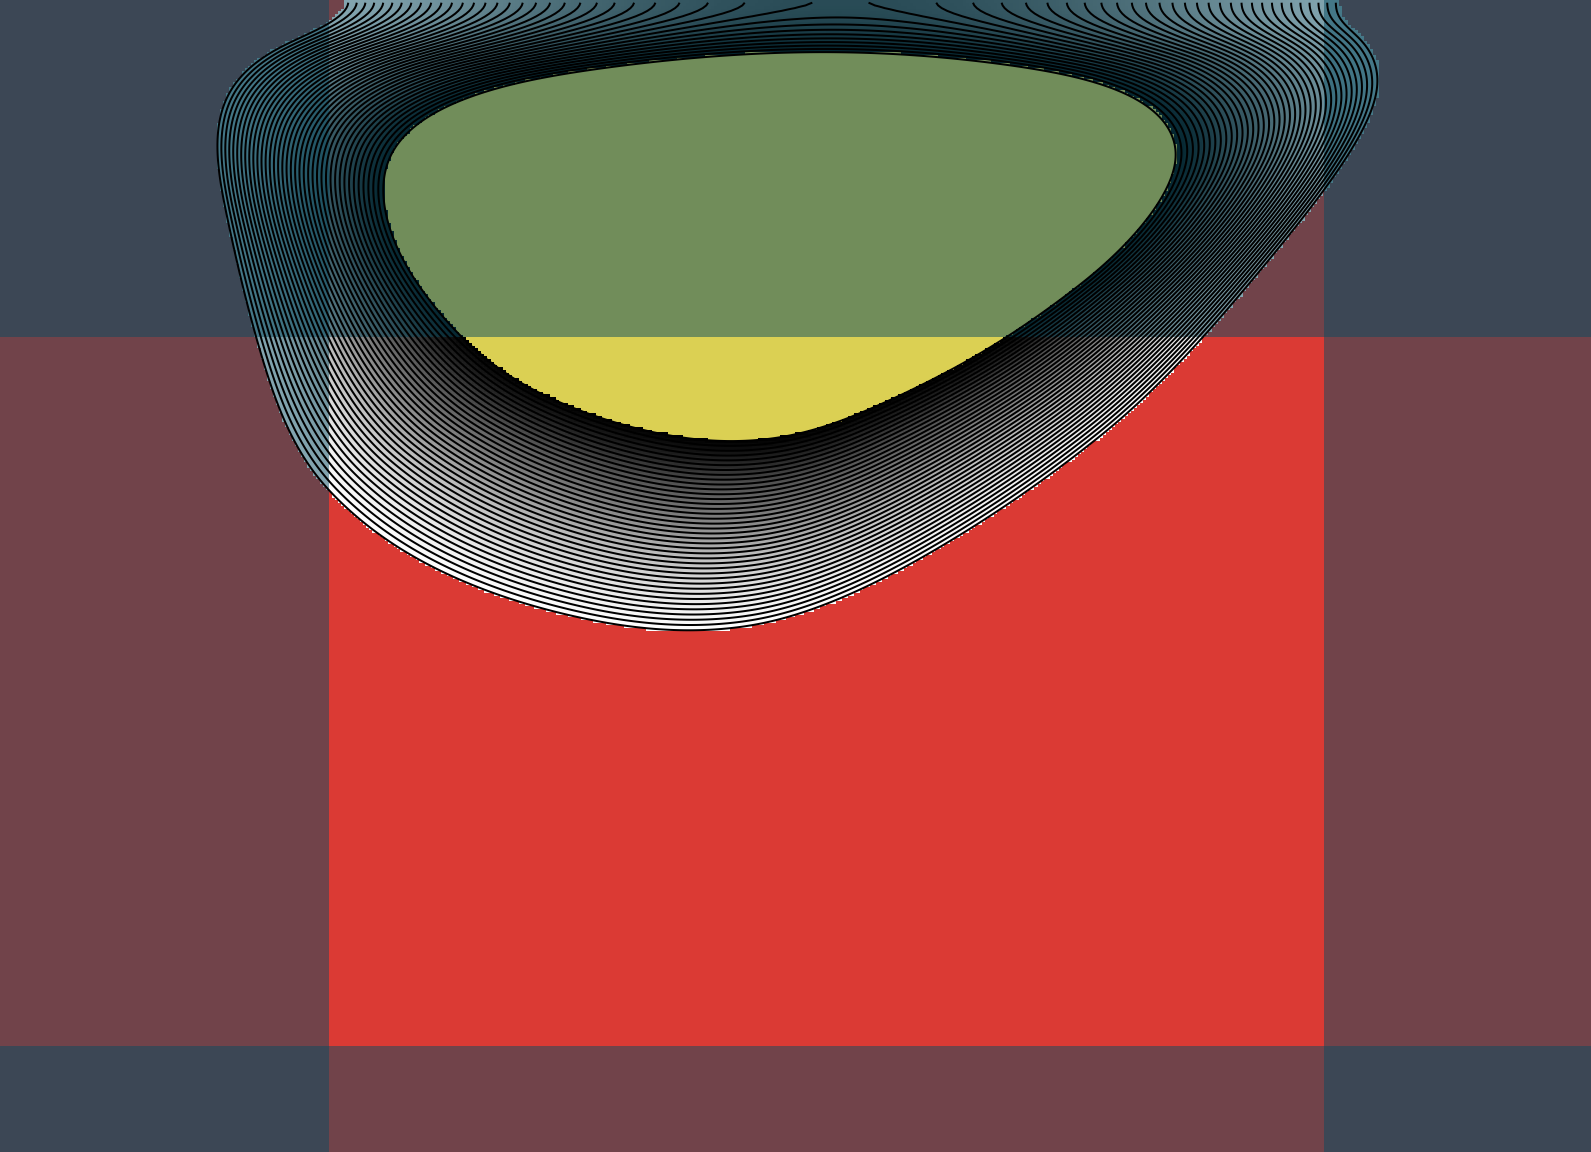

In [13]:
module.calibrate()